In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Interpolation tutorial

We have a function _f_ continuous between $[0,1]$; with `n+1` points where I am going to evaluate the function.

_Problem:_ Given $f_n$, can we reconstruct the function `f`?

So, given $(f(q_c), f(q_m))$, find $f^{~}$, s.t. $f^{~}(q_i) = f(q_i)$

## Linearity

```math
F(v+w) = F(v) + F(w)
F(aw) = aF(v)
```

Evaluation is a linear question:

$
eval(f+g) = (f+g)(q_o)+(f+g)(q_1)+...+(f+g)(q_n)
          = f(q_o)+f(q_1)+...+f(q_n) + g(q_o)+g(q_1)+...+g(q_n)
$

Therefore:

$eval(f+g) = eval(f)+eval(g)$

With this, we can represent evaluations as matrices, because of its linearity. So:

$P^n \rightarrow^{A} IR^{n+1}$
$P^n \leftarrow^{A^{-1}} IR^{n+1}$

where A is the evaluation operation.

--------------------------

If we have the following points: $q_o = 0, q_1 = 1.5, q_o = 1$ and the polinomial $2x^2+3x+1$, leading to:

$eval(2x^2+3x+1) = (1,3,6)$

This can be represented as:

```math
(0 0 1; 0.25 0.5 1; 1 1 1)(2; 3; 1) = (1,3,6)
```

Where the first matrix is the evaluation of `x`. It is possible to invert that matrix in order to get the coefficients. 

However, it is not good-performant using the $A^{-1}$

There is a polinomial which is `(1,3,6)`, whose evaluation is `(1,3,6)`. With this trick, we can make $A=I$. So, the inverse becomes irrelevant.

-------------------------------

Consider we have a new set of points $q_0, q_1,..., q_n$ and $e_0, e_1,..., e_n$

To go from $f(q_0) \rightarrow f(e_0)$, we perform evaluation and in the other way arround, we use interpolation.

However, performing evaluation by substituting $x$ on the polinomial is a way less performant. You can use _evaluation linearity_ in order to get it in a more efficient way.

$eval((1,3,6))=eval((1,0,0))+3eval((0,1,0))+6eval((0,0,1))$

With 

$(1,0,0) = \frac{(x-\frac{1}{2})(x-1)}{(0-\frac{1}{2})(0-1)}$

$(0,1,0) = \frac{(x-0)(x-1)}{(\frac{1}{2}-0)(\frac{1}{2}-1)}$

Which is the _Lagrange_ evaluation

We can evaluate the polinomial by: $x(2x+3)+1$, which is still more performant than $2x^2 + 3x + 1$.

_Interpolation and approximation are not the same_. We can approximate without interpolating or viceversa.

Having more points for interpolating the function, and then approximate, you can have cathastrophic oscillations, which can lead to worse errors.

**Why interpolation fails when we have more points?**

The error is bound by:

* The polinomial space is small
* Taking a non-optimal polinomial

However, having greater polinomial order can worse the error, because the space is wider. It is harder to get the optimal polinomial.

# Exercises

### Lagrangian

$L = \frac{(x-q_0)(x-q_1)...(x-q_n)}{(q_i-q_0)(q_i-q_1)...(q_i-q_n)}$

In this case, $x = e$

In [17]:
# We want to have the lagrange evaluation when:
# p0 -> (1,0,...,0)
# p1 -> (0,1,...,0)
# Create a table with B[i,j] = p_j(e_i), where e_i are the evaluation points given above
def generate_lagrange_basis(q, e):
    """
    q: array of interpolation points. I already know the function
    e: array of evaluation points. I would like to get the values of the function
    """
    assert len(q.shape) == 1
    assert len(e.shape) == 1
    
    n_evaluation_points = e.shape[0]
    n_interpolation_points = q.shape[0]
    
    basis = np.ones((n_evaluation_points, n_interpolation_points), dtype=float64)
    
    for i in range(n_evaluation_points):
        for j in range(n_interpolation_points):
            for k in range(n_interpolation_points):
            # Evaluation of the polinomial
                if j == k:
                    # Avoid zero div
                    continue
                basis[i,j] *= ((e[i]-q[k])/(q[j]-q[k]))
    return basis

In [42]:
# Test numbers
q = np.linspace(0,1,10) # We know the function at these points
e = np.linspace(0,1,5) # We would like to know the function at these points

# Generate lagrange polinomial
generate_lagrange_basis(q,e)

In [43]:
# The columns are the lagrangian polinomial for a given q
# The rows are the evaluations of the lagrangian polinomial

In [44]:
q

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [45]:
e

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [46]:
def interpolate_function(f,q,e):
    """
    f: function to interpolate
    q: known points
    e: evaluation to recreate the function
    """
    basis = generate_lagrange_basis(q,e)
    
    n_evaluation_points = e.shape[0]
    n_interpolation_points = q.shape[0]
    
    y = np.zeros((n_evaluation_points,1))
    
    # We want to apply evaluation's linearity 
    # eval(1,3,6) = eval(1,0,0)+3eval(0,1,0)+6eval(0,0,1)
    # We have them in the basis
    # 1,3,6 are q_i
    
    for i in range(n_evaluation_points):
        for j in range(n_interpolation_points):
            y[i] += f(q[j]) * basis[i,j]
    return y

In [70]:
# Function to test
def sine_f(x):
    return (np.tan(2*np.pi*x)+x*2*x)

In [73]:
# Test
e = np.linspace(0,1,30)
q = np.linspace(0,1,30)
y_i = interpolate_function(sine_f, q, e)

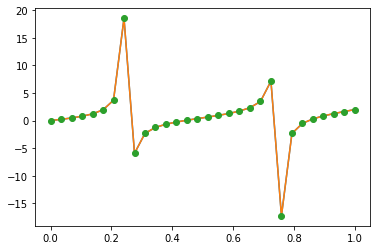

In [74]:
plot(e, sine_f(e))
plot(e, y_i)
plot(q, sine_f(q), 'o')

# Increase the number of known points (q), we have a better approximation

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])